In [40]:
import os
import numpy as np
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

In [41]:

objFilePath = 'meshes\\armadillo1.obj'

points = []
faces = []
with open(objFilePath) as file:
    while 1:
        line = file.readline()
        if not line:
            break
        strs = line.split(" ")
        if strs[0] == "v":
            points.append((float(strs[1]), float(strs[2]), float(strs[3])))
        if strs[0] == "f":
            faces.append((int(strs[1]), int(strs[2]), int(strs[3])))
             
points = np.array(points)
faces = np.array(faces)

In [42]:
points

array([[-0.12691 ,  0.147998, -0.114354],
       [-0.136929,  0.15039 , -0.093023],
       [-0.851321, -0.078791,  0.033856],
       ...,
       [ 0.128854, -0.035149, -0.349888],
       [-0.383633,  0.32337 , -0.011644],
       [-0.383877,  0.323405, -0.010039]])

In [43]:
faces

array([[    2,     1, 23172],
       [    1, 21444, 23172],
       [21444, 22001, 23172],
       ...,
       [11636, 11638, 10833],
       [28739, 11636, 11630],
       [11630, 11636, 10833]])

In [44]:
your_mesh = mesh.Mesh.from_file('make-it-stand_data\models\\armadillo1\\armadillo1_outer.stl')


In [45]:
# The mesh normals (calculated automatically)
your_mesh.normals
# The mesh vectors
your_mesh.v0, your_mesh.v1, your_mesh.v2
# Accessing individual points (concatenation of v0, v1 and v2 in triplets)
assert (your_mesh.points[0][0:3] == your_mesh.v0[0]).all()
assert (your_mesh.points[0][3:6] == your_mesh.v1[0]).all()
assert (your_mesh.points[0][6:9] == your_mesh.v2[0]).all()
assert (your_mesh.points[1][0:3] == your_mesh.v0[1]).all()

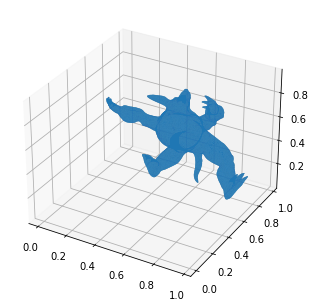

In [46]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [47]:
volume, cog, inertia = your_mesh.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))

Volume                                  = 0.030976354226644975
Position of the center of gravity (COG) = [0.69577698 0.50558633 0.6387259 ]
Inertia matrix at expressed at the COG  = [1.12050744e-03 1.65343020e-05 2.73965520e-04]
                                          [1.65343020e-05 1.16590708e-03 1.55478062e-04]
                                          [0.00027397 0.00015548 0.00126509]


In [50]:
mesh_inner = mesh.Mesh.from_file('make-it-stand_data\models\\armadillo1\\armadillo1_inner.stl')

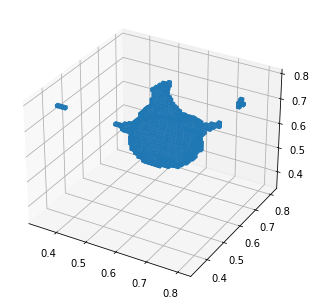

In [56]:
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(mesh_inner.vectors))

# Auto scale to the mesh size
scale = mesh_inner.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()